In [1]:
a=3
a

3

In [2]:
import pandas as pd
df=pd.read_csv('temperature.csv')

In [2]:
df

,CPU Total,CPU Package Temperature,Memory,Used Memory
0,3.528023,40,48.994663,1.918564
1,5.060095,40,48.971184,1.917644
2,10.937500,40,49.110200,1.923088
3,5.078125,40,49.125004,1.923668
4,2.343750,40,49.137670,1.924164
...,...,...,...,...
2185,8.203125,48,54.053402,2.116657
2186,23.437500,48,54.217260,2.123074
2187,17.968750,48,54.272884,2.125252
2188,11.742425,48,54.247360,2.124252


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CPU Total                2190 non-null   float64
 1   CPU Package Temperature  2190 non-null   int64  
 2   Memory                   2190 non-null   float64
 3   Used Memory              2190 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 68.6 KB


In [4]:
df.isna().sum().sum()

0

it's clearly that our data is clean from nan values

In [32]:
df.drop_duplicates(inplace=True)


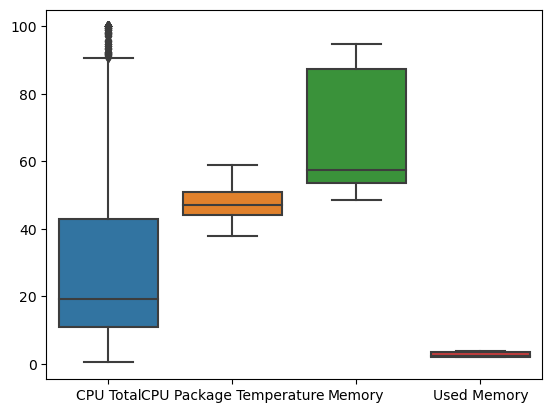

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.show()

In [9]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [10]:
df=remove_outlier_IQR(df)

In [11]:
df.dropna(inplace=True)

# checking outliers after hanadle it

<Axes: >

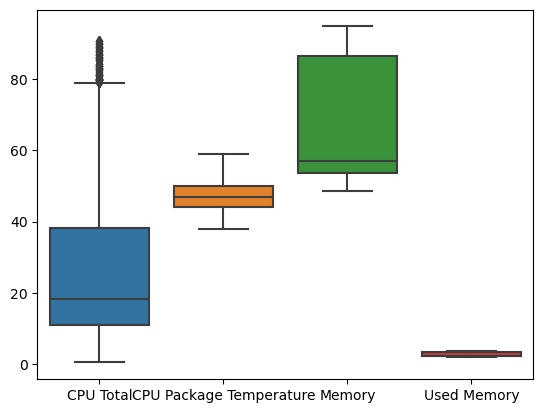

In [12]:
sns.boxplot(data=df)

# correlation

<Axes: >

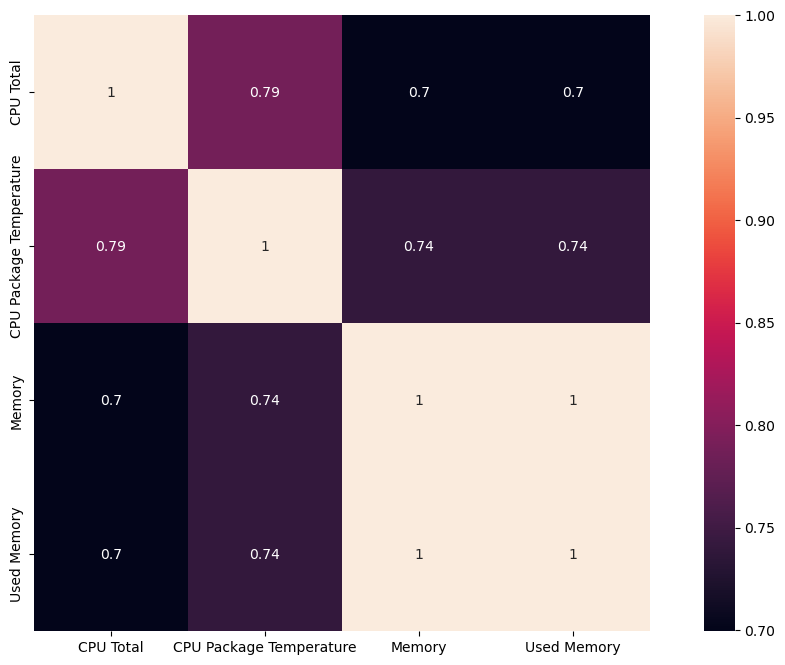

In [13]:
corr=df.corr()
plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, square = True)

In [14]:
y=df.pop('CPU Package Temperature')
X=df

In [15]:
useless=X.pop('Memory')

In [16]:
X

,CPU Total,Used Memory
0,3.528023,1.918564
1,5.060095,1.917644
2,10.937500,1.923088
3,5.078125,1.923668
4,2.343750,1.924164
...,...,...
2185,8.203125,2.116657
2186,23.437500,2.123074
2187,17.968750,2.125252
2188,11.742425,2.124252


In [17]:
# df.dropna(inplace=True)
X.isna().sum()

CPU Total      0
Used Memory    0
dtype: int64

as we see used memory and memory is very coorelated ,so it's useless to use them both

In [18]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
    test_size=0.2,
    random_state=0)

# Build the model

In [33]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 0) 

regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [34]:
pred=regressor.predict(X_test)
pred_train=regressor.predict(X_train)
print("Train Error:", mean_absolute_error(y_train,pred_train))
print("Test Error:", mean_absolute_error(y_test,pred))

Train Error: 0.0
Test Error: 1.4622641509433962


RMSE: 2.4437058156021045


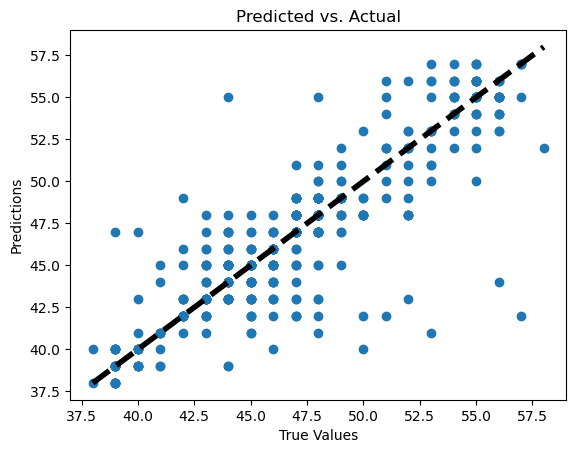

In [37]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


y_pred = regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual')
plt.show()


In [25]:
X_test.shape
y_test.shape

(424,)

In [26]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


# Evaluation du modele

In [27]:

round(r2_score(y_train, pred_train), 3), round(mean_absolute_error(y_train, pred_train), 2), round(np.sqrt(mean_squared_error(y_train, pred_train)),2)

(1.0, 0.0, 0.0)

In [28]:

round(r2_score(y_test, pred), 3), round(mean_absolute_error(y_test, pred), 2), round(np.sqrt(mean_squared_error(y_test, pred)),2)

(0.73, 1.46, 2.44)

In [29]:
from sklearn.tree import plot_tree

# Visualising the decision tree regression results

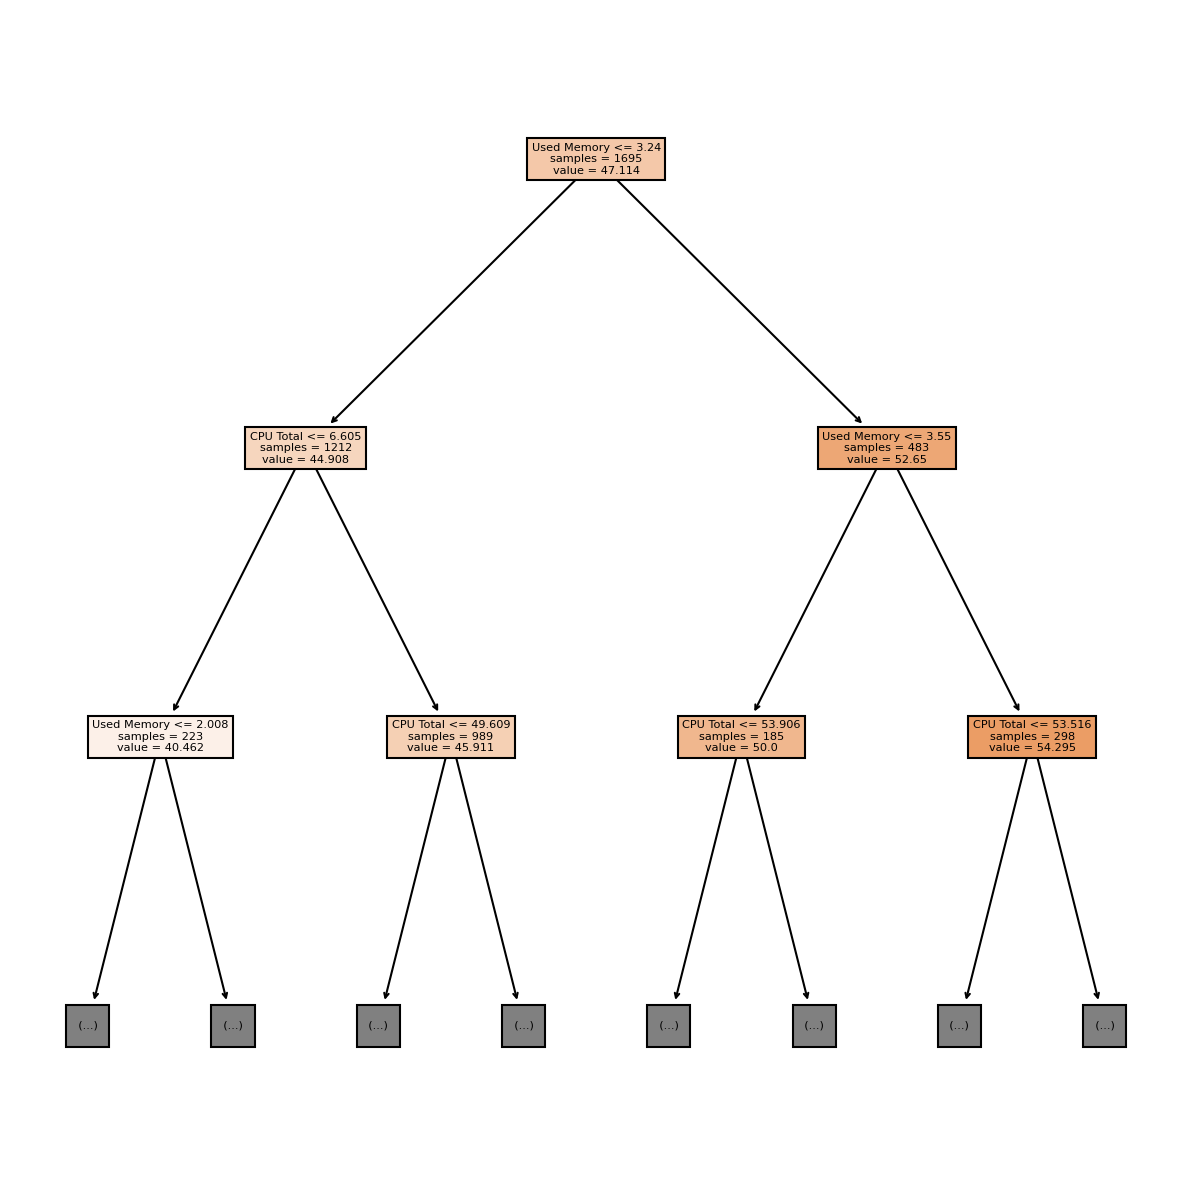

In [30]:

_ = plt.figure(figsize=(10,10), dpi=150)
_ = plot_tree(regressor,max_depth=2,feature_names=X.columns, impurity=False, filled=True)
_ = plt.show()